In [36]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv('test1.csv')
data.shape

(59974, 1)

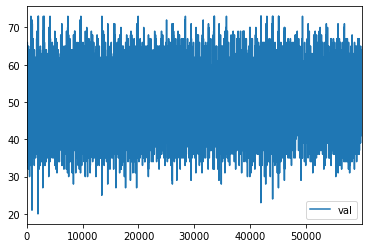

In [38]:
data.plot()

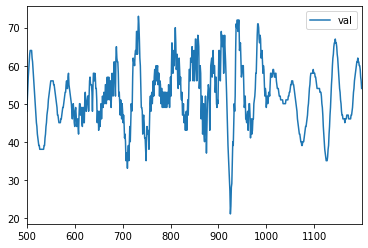

In [39]:
# first snoring instance
data[500:1200].plot()

In [43]:
# setting a date time index on data to perform seasonal decomposition
data.index = pd.DatetimeIndex(freq='d', start=0, periods=data.shape[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


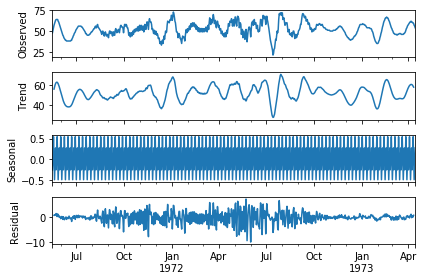

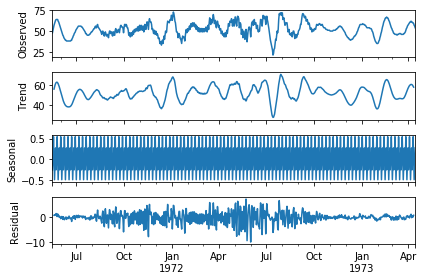

In [44]:
decomposition = seasonal_decompose(data[500:1200], model='additive')
decomposition.plot()

In [45]:
# to find peaks in the graph, and their respective indexes
import peakutils
from peakutils.plot import plot as pplot

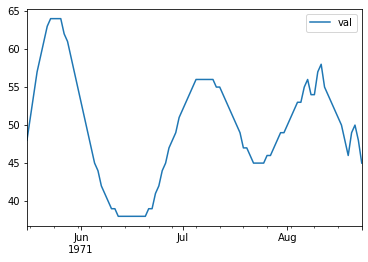

In [46]:
# non snoring data
test1 = data[500:600]
test1.plot()

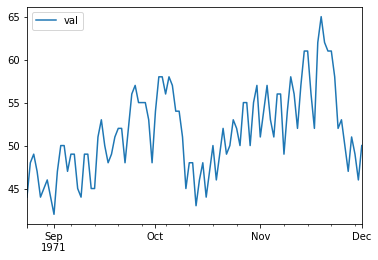

In [47]:
# snoring data
test2 = data[600:700]
test2.plot()

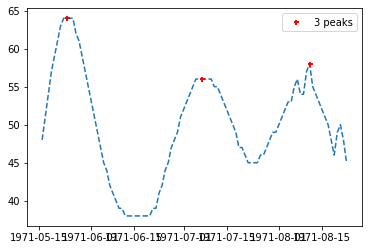

In [48]:
data.columns = ['vibrations']
test1 = data['vibrations'][500:600]
peaks = peakutils.indexes(test1, thres=0.5, min_dist=10)
len(peaks)
pplot(test1.index, test1, peaks)
#non snoring instance, we can see that peaks are less( 2 peaks in this case)

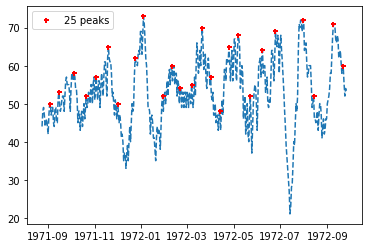

In [49]:
data.columns = ['vibrations']
test2 = data['vibrations'][600:1000]
peaks = peakutils.indexes(test2, thres=0.5, min_dist=10)
pplot(test2.index, test2, peaks)

In [50]:
#snoring instance, we can see there are more peaks compared to non-snoring( 25 peaks in this case)

In [ ]:
data.columns = ['vibrations']
for i in range(len(data)):
    test=data['vibrations'][0:59974:400]
    peaks = peakutils.indexes(test, thres=0.5, min_dist=10)
    pplot(test.index, test, peaks)
    if(peaks.count()> 25):
        print("Snoring")
    else:
        print("Non Snoring")
    